# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
temp_ny = temp.loc[temp["State"]=="New York"]
temp_ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
round(temp_ny["Temperature"].mean(), 1)


10.7

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
temp.loc[temp["Temperature"] > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
list(temp["City"].loc[temp["Temperature"] > 15])

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
list(temp["City"].loc[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)])

['NYC', 'Hartford']

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
newset=[]
for i in temp["State"]:
    
    temp_ny = temp.loc[temp["State"]== i]
    mean = round(temp_ny["Temperature"].mean(),1)
    stdev = round(temp_ny["Temperature"].std(),1)

    print(f"Mean temp of {i}: {mean}")
    print(f"Stdev of {i}: {stdev}")


Mean temp of New York: 10.7
Stdev of New York: 8.1
Mean temp of New York: 10.7
Stdev of New York: 8.1
Mean temp of New York: 10.7
Stdev of New York: 8.1
Mean temp of Connecticut: 15.8
Stdev of Connecticut: 2.0
Mean temp of Connecticut: 15.8
Stdev of Connecticut: 2.0
Mean temp of New Jersey: 21.1
Stdev of New Jersey: 1.6
Mean temp of New Jersey: 21.1
Stdev of New Jersey: 1.6


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employee = pd.read_csv("employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

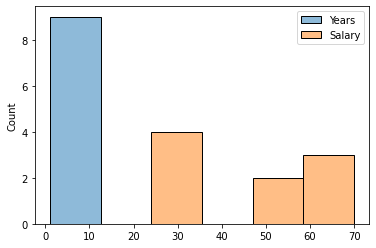

In [13]:
sns.histplot(employee)
plt.show()

#### What's the average salary in this company?

In [14]:
round(employee["Salary"].mean(),1)

48.9

#### What's the highest salary?

In [15]:
round(employee["Salary"].max(),1)

70

#### What's the lowest salary?

In [16]:
round(employee["Salary"].min(),1)


30

#### Who are the employees with the lowest salary?

In [17]:
employee.loc[employee["Salary"] == employee["Salary"].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [18]:
employee.loc[employee["Name"] == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [19]:
employee[["Name", "Salary"]].loc[employee["Name"] == "David"]

,Name,Salary
2,David,30


#### Print all the rows where job title is associate

In [20]:
employee.loc[employee["Title"] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [21]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [23]:
employee[["Name", "Title", "Salary"]].loc[employee["Salary"] > 55]

,Name,Title,Salary
6,Carlos,VP,70
7,Pedro,associate,60
8,Ana,VP,70


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [24]:
pd.DataFrame(round(employee.groupby("Years")["Salary"].mean(),1))

,Salary
Years,
1,35.0
2,38.3
3,55.0
4,35.0
7,60.0
8,70.0


####  What is the average Salary per title?

In [25]:
pd.DataFrame(round(employee.groupby("Title")["Salary"].mean(),1))

,Salary
Title,
VP,70.0
analyst,32.5
associate,56.7


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot: xlabel='Salary'>

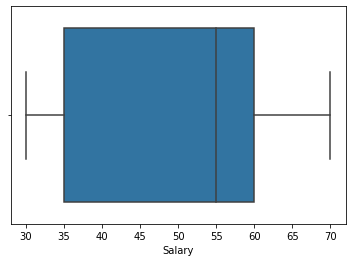

In [26]:
sns.boxplot(x="Salary", data=employee)

In [27]:
employee["Salary"].quantile(0.25)

35.0

In [28]:
employee["Salary"].quantile(0.75)

60.0

#### Is the mean salary per gender different?

<AxesSubplot: xlabel='Salary', ylabel='Gender'>

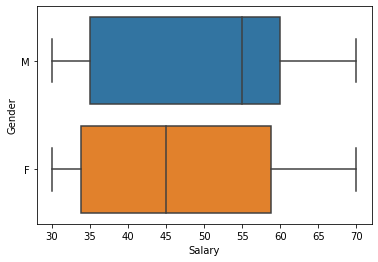

In [29]:
sns.boxplot(x="Salary", y="Gender", data=employee)

Yes, the mean salary is different. Higher for men.

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
print("Mean values")
display(pd.DataFrame(round(employee.groupby("Department")[["Salary", "Years"]].mean(),1)))

print("Max values")
display(pd.DataFrame(round(employee.groupby("Department")[["Salary", "Years"]].max(),1)))

print("Min values")
display(pd.DataFrame(round(employee.groupby("Department")[["Salary", "Years"]].min(),1)))

Mean values


,Salary,Years
Department,,
HR,45.0,4.7
IT,48.8,4.5
Sales,55.0,2.5


Max values


,Salary,Years
Department,,
HR,70,8
IT,70,8
Sales,55,3


Min values


,Salary,Years
Department,,
HR,30,2
IT,30,1
Sales,55,2


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [35]:
employee.groupby("Department").apply(lambda x: max(x["Salary"]) - min(x["Salary"]))

Department
HR       40
IT       40
Sales     0
dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
orders = pd.read_csv("Orders.zip")
orders

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
orders.dtypes

In [ ]:
orders.describe()

####  What is the average Purchase Price?

In [ ]:
round(orders["UnitPrice"].mean(),1)

#### What were the highest and lowest purchase prices? 

In [ ]:
round(orders["UnitPrice"].max(),1)

In [ ]:
round(orders["UnitPrice"].min(),1)

#### Select all the customers we have in Spain

In [ ]:
orders.loc[orders["Country"]=="Spain"]

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
len(orders["CustomerID"].loc[orders["Country"]=="Spain"].unique())

#### Select all the customers who have bought more than 50 items ?

In [ ]:
orders.loc[orders["Quantity"] > 50].head()

#### Select orders from Spain that are above 50 items

In [ ]:
orders.loc[(orders["Quantity"] > 50) & (orders["Country"] == "Spain")].head()

#### Select all free orders

In [ ]:
orders.loc[orders["amount_spent"] == 0]

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
orders.loc[orders["Description"].str.contains("lunch bag.*")][:10]

In [ ]:
orders[orders.Description.apply(lambda x: "lunch bag" in x )][:10]

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
orders.loc[(orders["Description"].str.contains("lunch bag.*")) & (orders["year"]== 2011)][:10]

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
sns.histplot(data = orders["amount_spent"].loc[orders["Country"] == "Spain"])

#### Select all orders made in the month of August

In [ ]:
orders.loc[orders["month"]==8]

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
orders["Country"][orders["month"] == 8].value_counts()

#### What's the  average amount of money spent by country

In [ ]:
pd.DataFrame(round(orders.groupby("Country")["amount_spent"].mean(),1))

#### What's the most expensive item?

In [ ]:
orders[orders["UnitPrice"] == orders["UnitPrice"].max()]

#### What was the average amount spent per year ?

In [ ]:
pd.DataFrame(round(orders.groupby("year")["amount_spent"].mean(),1))